In [1]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# 2. Load the Excel dataset
file_path = "C:\\Users\\User\\Desktop\\intern2\\ML_new.xlsx"
df = pd.read_excel(file_path)

# 3. Check for missing values and drop them
print("Missing values:\n", df.isnull().sum())
df.dropna(inplace=True)  # You could use df.fillna() instead, if needed

# 4. Define input features and target variable
X = df.drop(columns=['Efficiency'])
y = df['Efficiency']

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# SVR works better with scaled data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVR model
svr_model = SVR(kernel='rbf')  # Try 'linear' or 'poly' as alternatives
svr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate performance
print("\nSVR Results:")
print("R2 Score:", r2_score(y_test, y_pred_svr))
print("MSE:", mean_squared_error(y_test, y_pred_svr))
print("MAE:", mean_absolute_error(y_test, y_pred_svr))



# ------------------- 7. Random Forest -------------------
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Results:")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))

# ------------------- 8. XGBoost -------------------
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("\nXGBoost Results:")
print("R2 Score:", r2_score(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))


Missing values:
 Thickness                  0
Defect density             0
Band gap                   0
Electron affinity          0
Dielectric permittivity    0
CB effective DOS           0
VB effective DOS           0
Acceptor density           0
Efficiency                 0
dtype: int64

SVR Results:
R2 Score: 0.9145459590603989
MSE: 12.940306404719767
MAE: 2.6292673707492993

Random Forest Results:
R2 Score: 0.9997853923936744
MSE: 0.032498032300196746
MAE: 0.09307505851363396

XGBoost Results:
R2 Score: 0.9999391404663824
MSE: 0.009215959877388413
MAE: 0.051140506443509245


Visualize Predictions

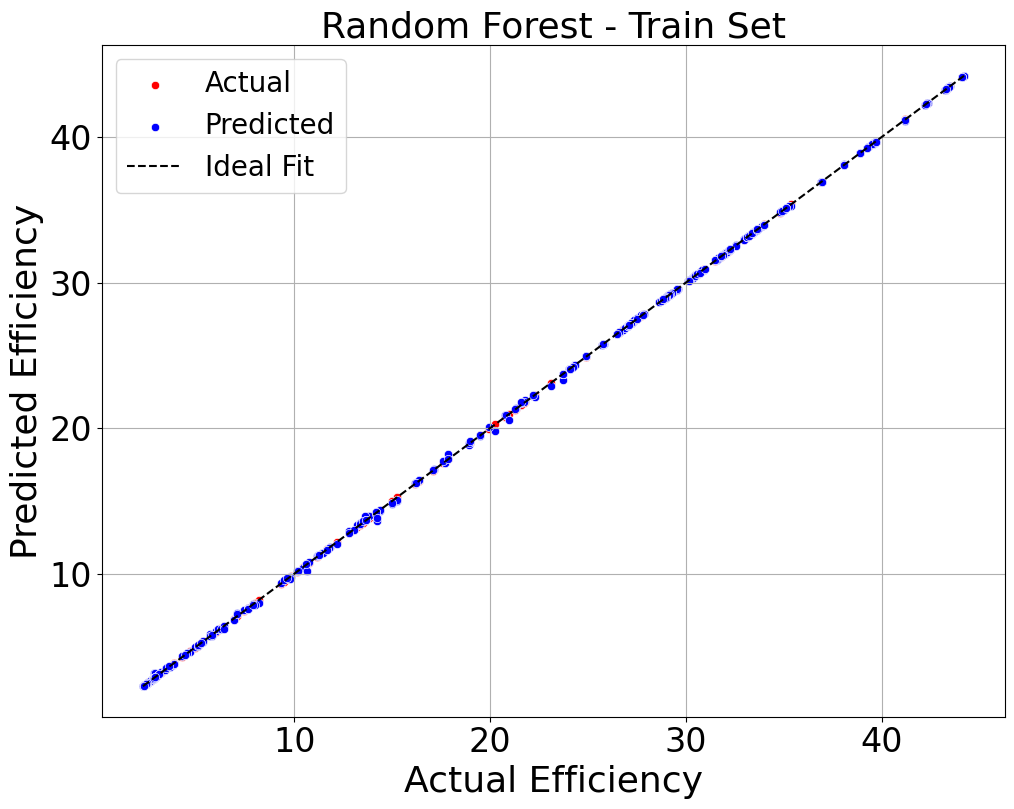

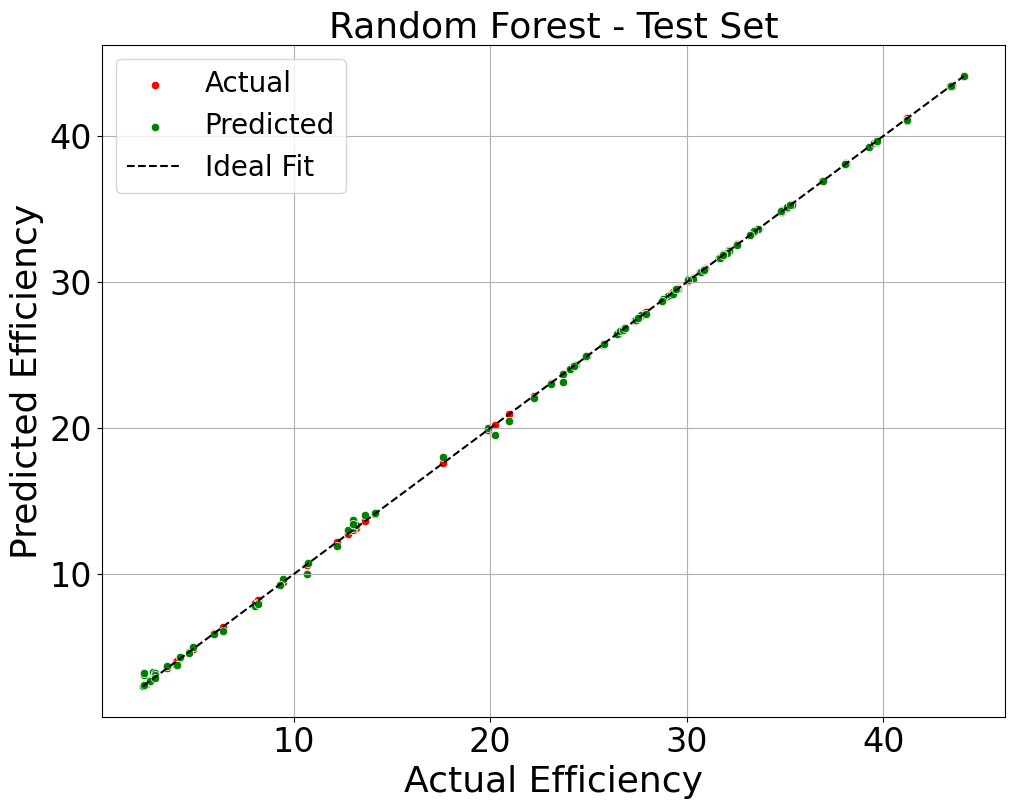

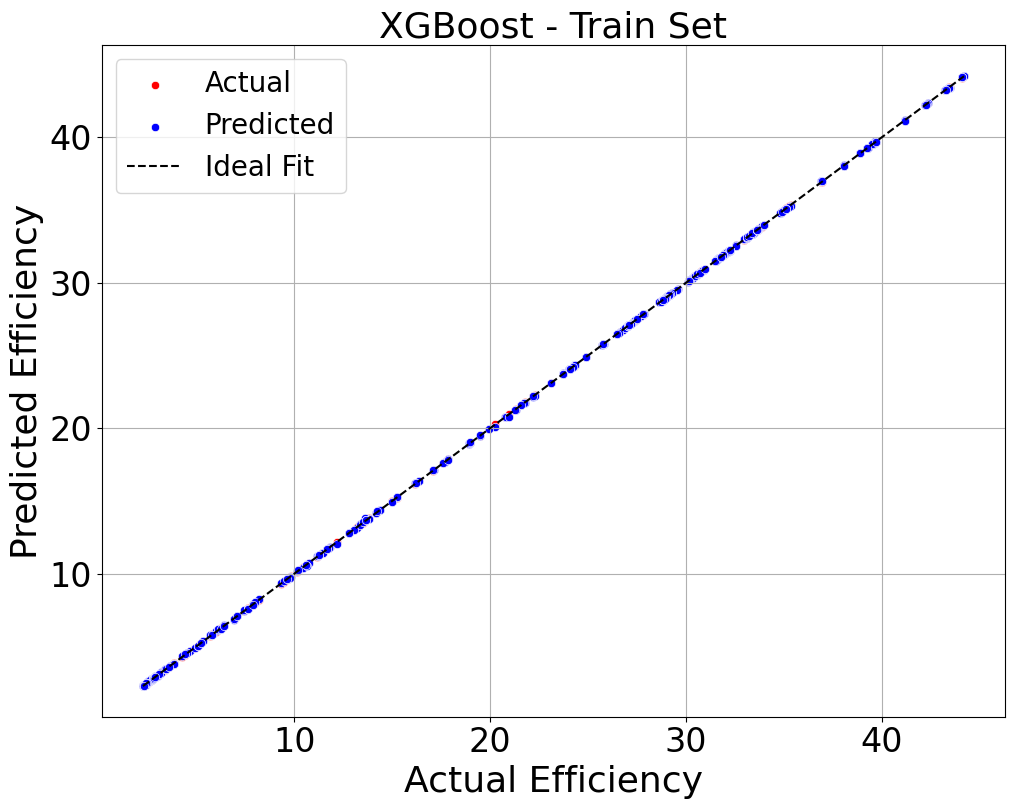

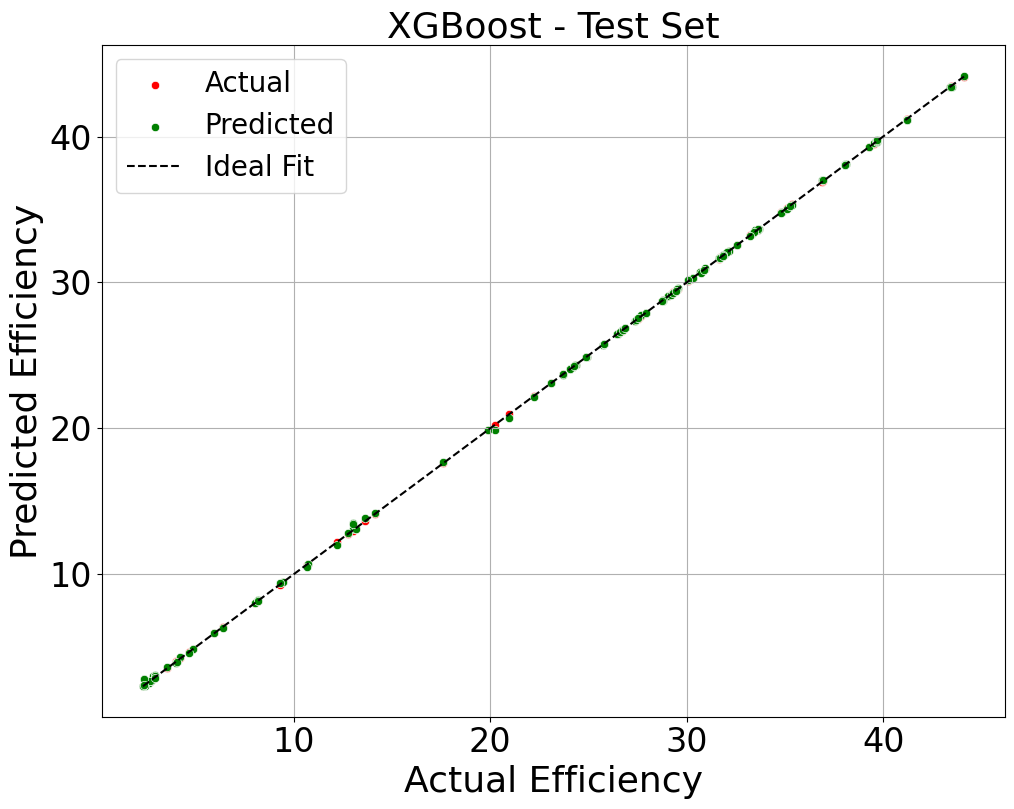

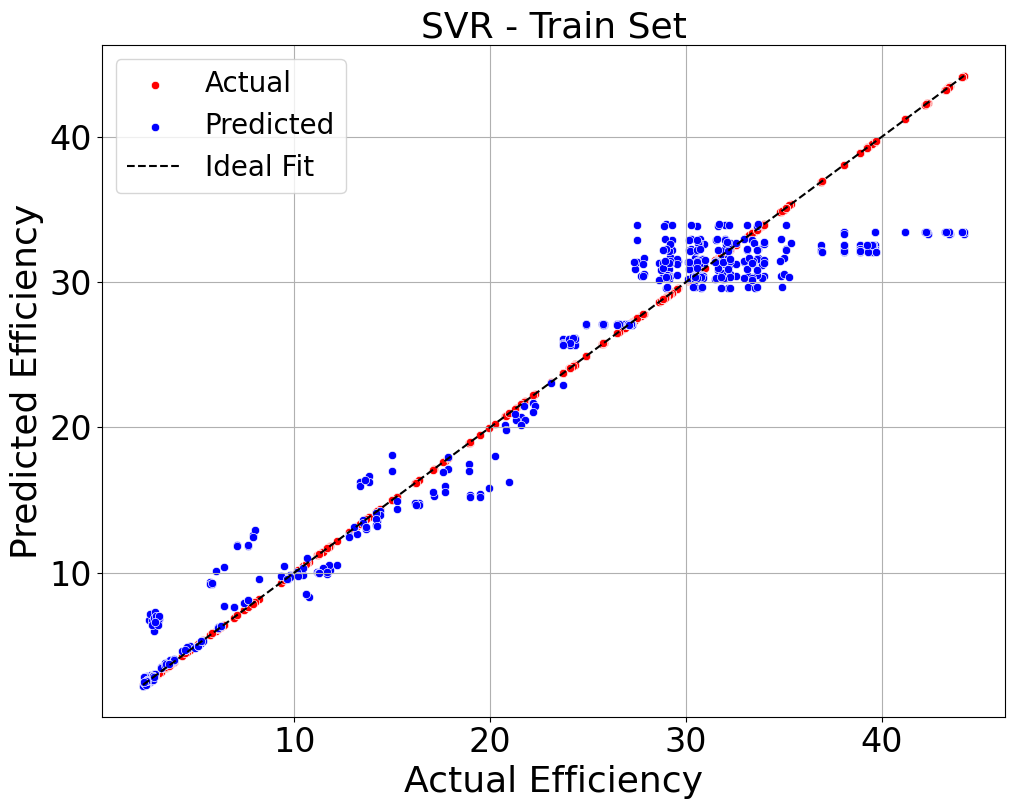

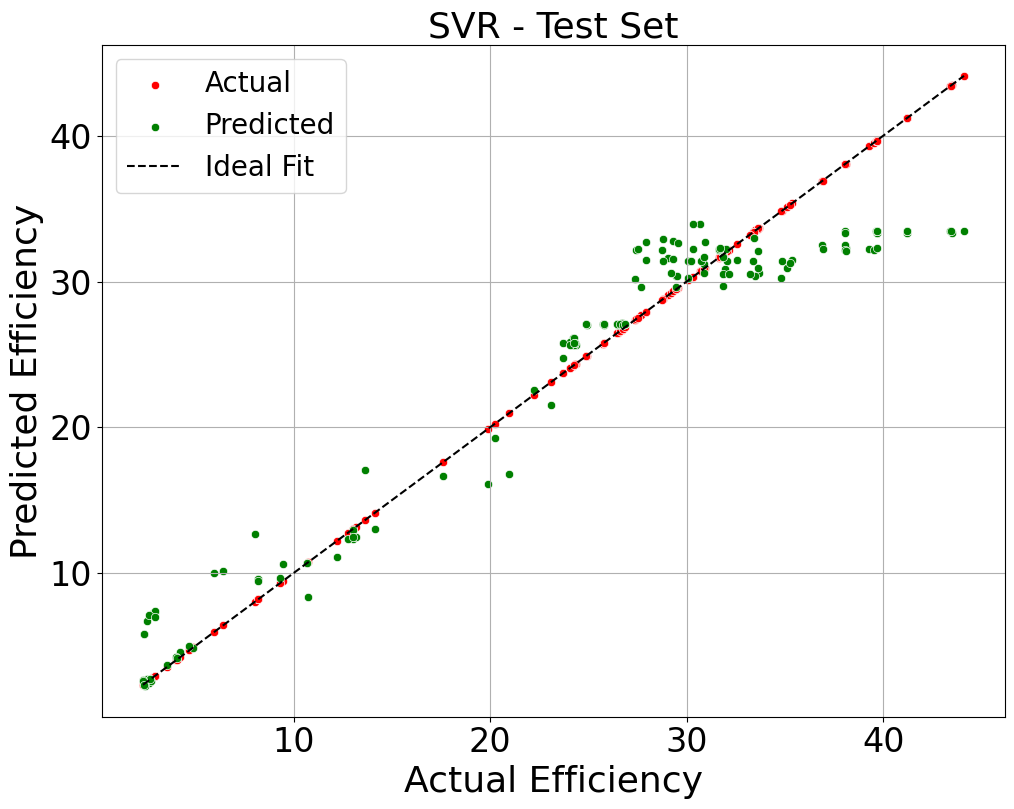

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Recalculate train predictions if needed
y_pred_rf_train = rf_model.predict(X_train)
y_pred_xgb_train = xgb_model.predict(X_train)
y_pred_svr_train = svr_model.predict(X_train_scaled)  # SVR uses scaled features

models = {
    'Random Forest': (y_train, y_pred_rf_train, y_test, y_pred_rf),
    'XGBoost': (y_train, y_pred_xgb_train, y_test, y_pred_xgb),
    'SVR': (y_train, y_pred_svr_train, y_test, y_pred_svr),
}

for model_name, (y_tr, y_tr_pred, y_te, y_te_pred) in models.items():
    # Train Set Plot
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=y_tr, y=y_tr, color='red', label='Actual')
    sns.scatterplot(x=y_tr, y=y_tr_pred, color='blue', label='Predicted')
    plt.plot([y_tr.min(), y_tr.max()], [y_tr.min(), y_tr.max()], 'k--', label='Ideal Fit')
    plt.xlabel("Actual Efficiency", fontsize=26)
    plt.ylabel("Predicted Efficiency", fontsize=26)
    plt.title(f"{model_name} - Train Set", fontsize=26)
    plt.legend(loc='upper left', fontsize=20)
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.show()

    # Test Set Plot
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=y_te, y=y_te, color='red', label='Actual')
    sns.scatterplot(x=y_te, y=y_te_pred, color='green', label='Predicted')
    plt.plot([y_te.min(), y_te.max()], [y_te.min(), y_te.max()], 'k--', label='Ideal Fit')
    plt.xlabel("Actual Efficiency", fontsize=26)
    plt.ylabel("Predicted Efficiency", fontsize=26)
    plt.title(f"{model_name} - Test Set", fontsize=26)
    plt.legend(loc='upper left', fontsize=20)
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.show()


Random Forest model

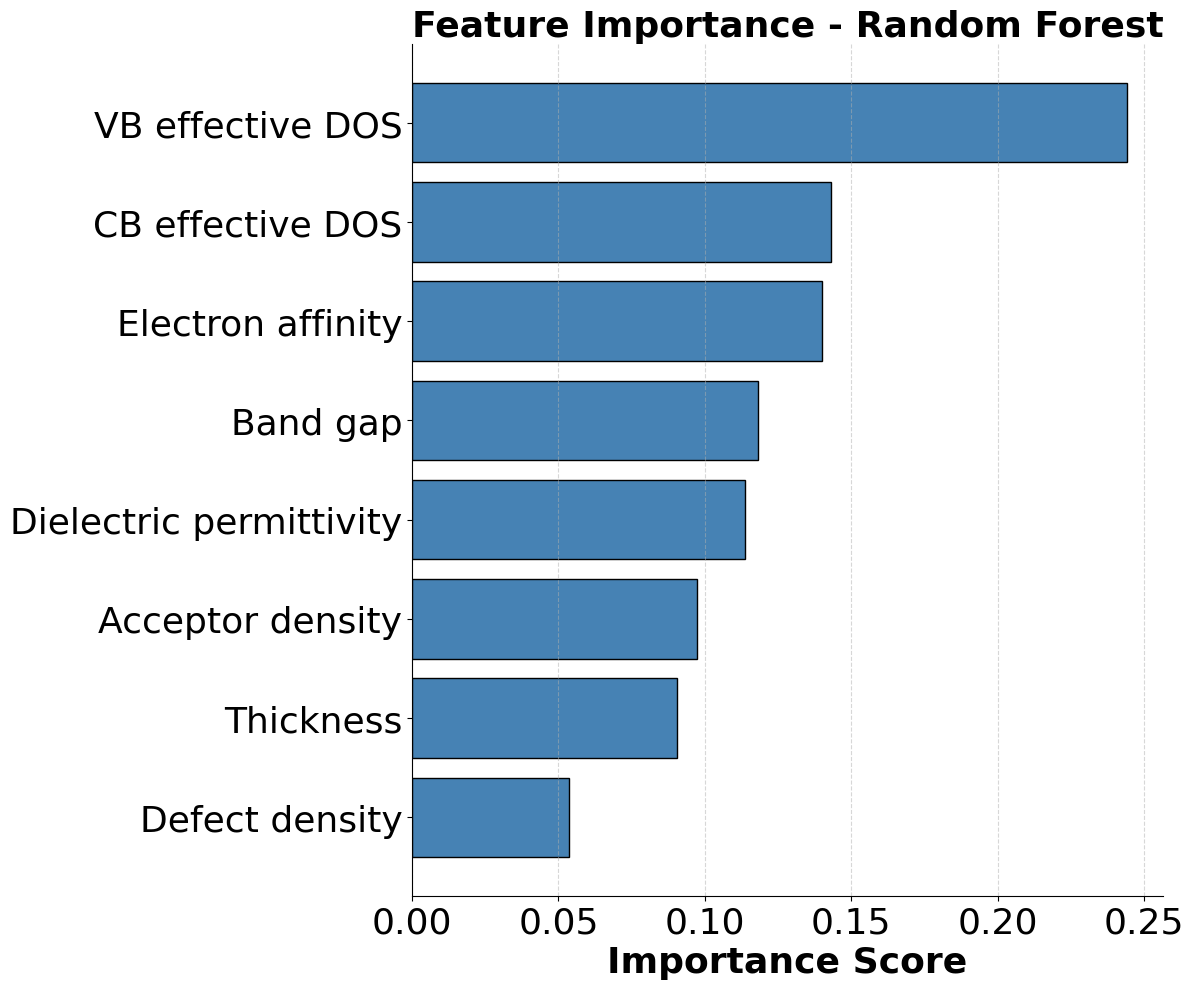

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance from the trained Random Forest model
importances_rf = rf_model.feature_importances_
features = X.columns

# Sort features by importance (descending)
indices = np.argsort(importances_rf)[::-1]
sorted_features = features[indices]
sorted_importances = importances_rf[indices]

# Plot as horizontal bar chart
plt.figure(figsize=(12, 10))
bars = plt.barh(range(len(sorted_features)), sorted_importances, color='steelblue', edgecolor='black')

# Invert y-axis to have highest importance on top
plt.gca().invert_yaxis()

# Styling
plt.yticks(range(len(sorted_features)), sorted_features, fontsize=26)
plt.xticks(fontsize=26)
plt.xlabel("Importance Score", fontsize=26, fontweight='bold')
plt.title("Feature Importance - Random Forest", fontsize=26, fontweight='bold')

# Optional: remove top/right spines
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Optional: add grid for clarity
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


XGBoost

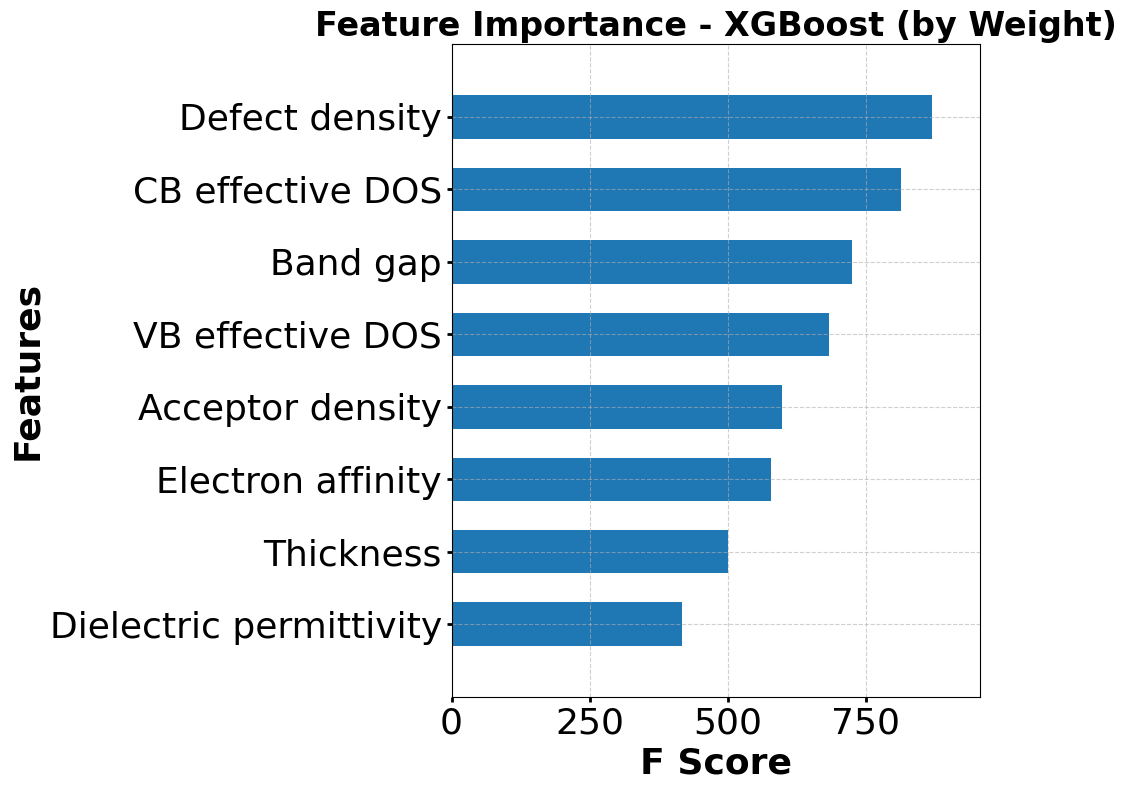

In [4]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot feature importance (by weight) with enhanced styling
fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(
    xgb_model,
    importance_type='weight',
    show_values=False,
    ax=ax,
    height=0.6,
)

# Customize fonts and layout
ax.set_title("Feature Importance - XGBoost (by Weight)", fontsize=24, fontweight='bold')
ax.set_xlabel("F Score", fontsize=26, fontweight='bold')
ax.set_ylabel("Features", fontsize=26, fontweight='bold')
ax.tick_params(axis='x', labelsize=26, width=2)
ax.tick_params(axis='y', labelsize=26, width=2)

plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Linear Regression

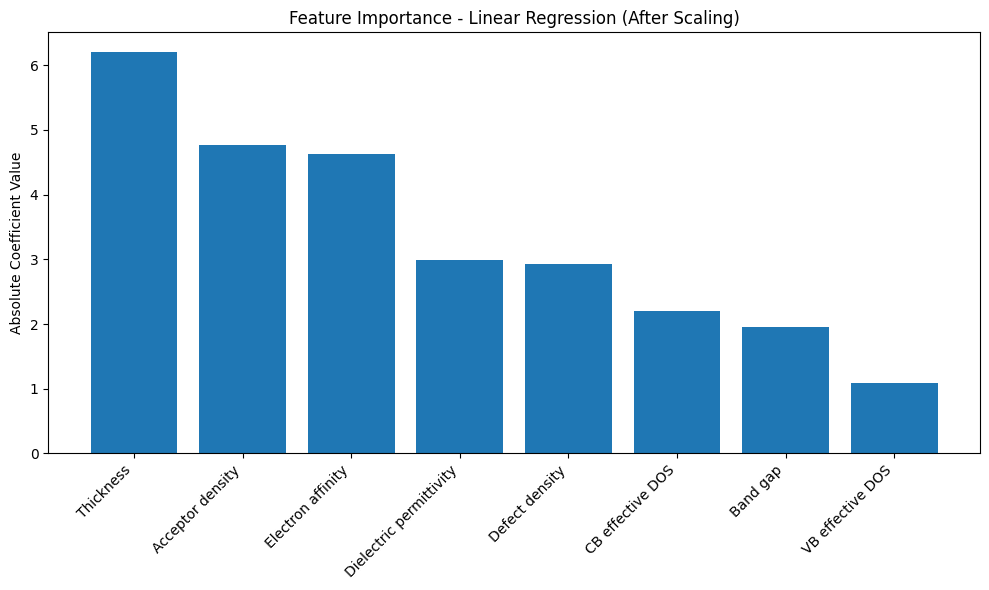

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # scale entire X

# Split scaled data
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
# Extract coefficients
coefficients = lr_model.coef_
features = X.columns

# Create DataFrame
lr_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients,
    'Absolute Coefficient': np.abs(coefficients)
})

# Sort
lr_importance = lr_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(lr_importance['Feature'], lr_importance['Absolute Coefficient'])
plt.xticks(rotation=45, ha='right')
plt.title("Feature Importance - Linear Regression (After Scaling)")
plt.ylabel("Absolute Coefficient Value")
plt.tight_layout()
plt.show()



Correlation Heatmap

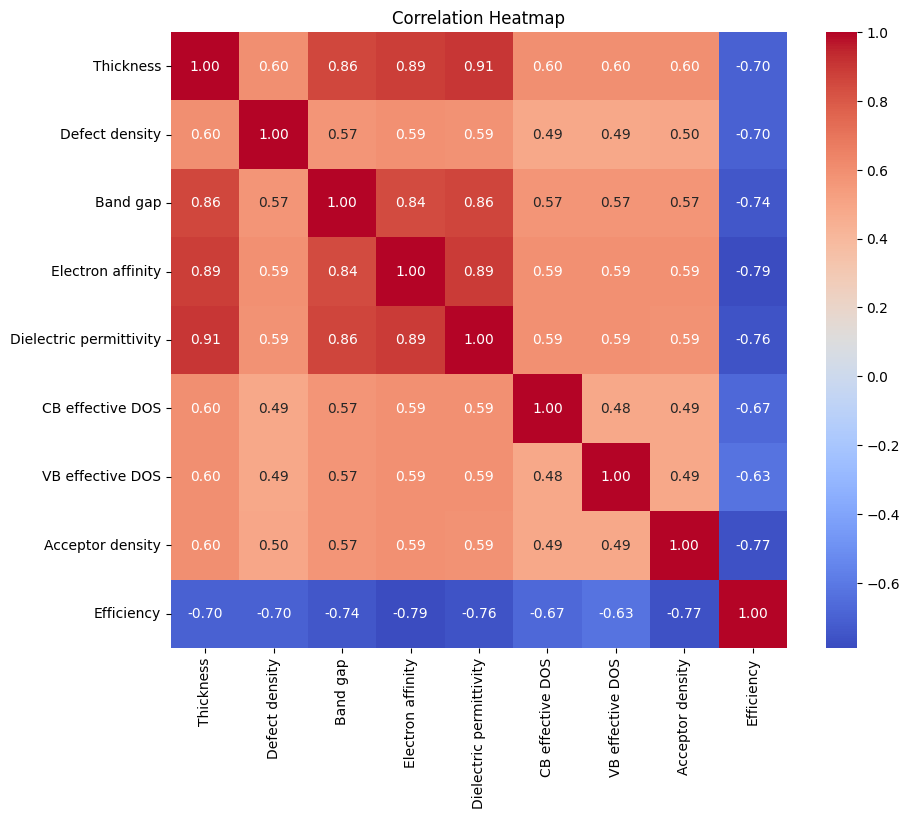

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()


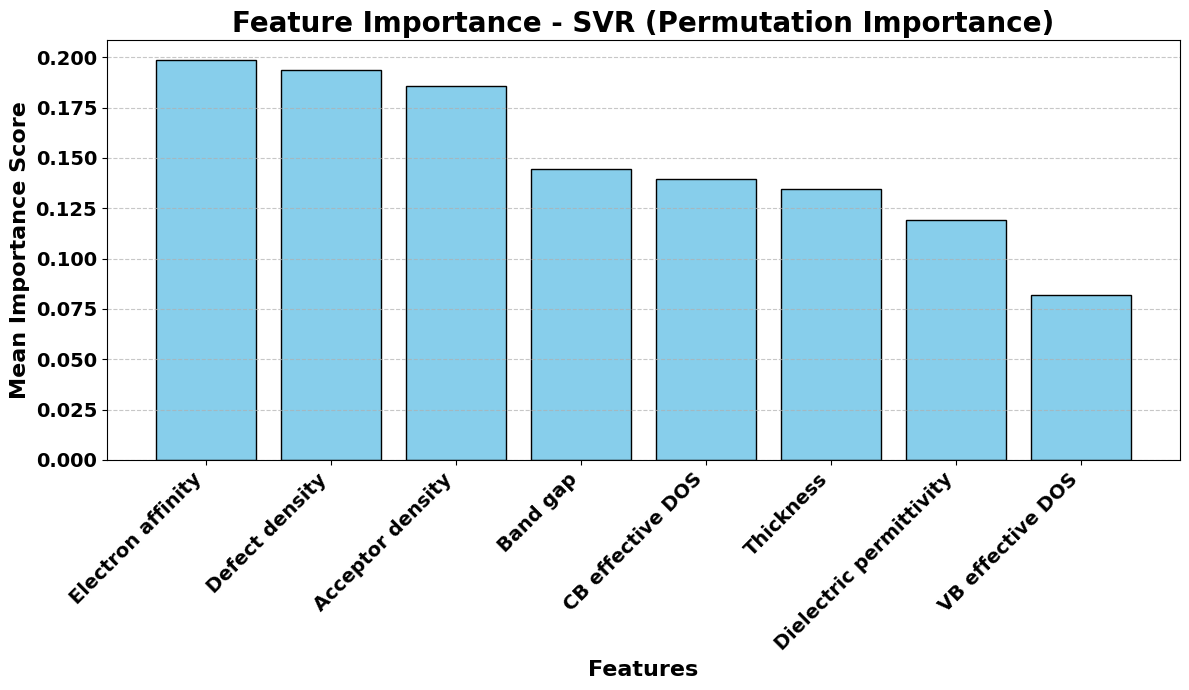

In [7]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

# Scale the data (important for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

# Permutation importance on scaled test data
perm_importance = permutation_importance(
    svr_model, X_test_scaled, y_test, n_repeats=30, random_state=42
)

# Organize into DataFrame
perm_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance Mean': perm_importance.importances_mean,
    'Importance Std': perm_importance.importances_std
}).sort_values(by='Importance Mean', ascending=False)

# Plotting
plt.figure(figsize=(12, 7))
bars = plt.bar(perm_df['Feature'], perm_df['Importance Mean'], color='skyblue', edgecolor='black')

plt.xticks(rotation=45, ha='right', fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

plt.title("Feature Importance - SVR (Permutation Importance)", fontsize=20, fontweight='bold')
plt.ylabel("Mean Importance Score", fontsize=16, fontweight='bold')
plt.xlabel("Features", fontsize=16, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Calculate Permutation Importance for SVR & model training


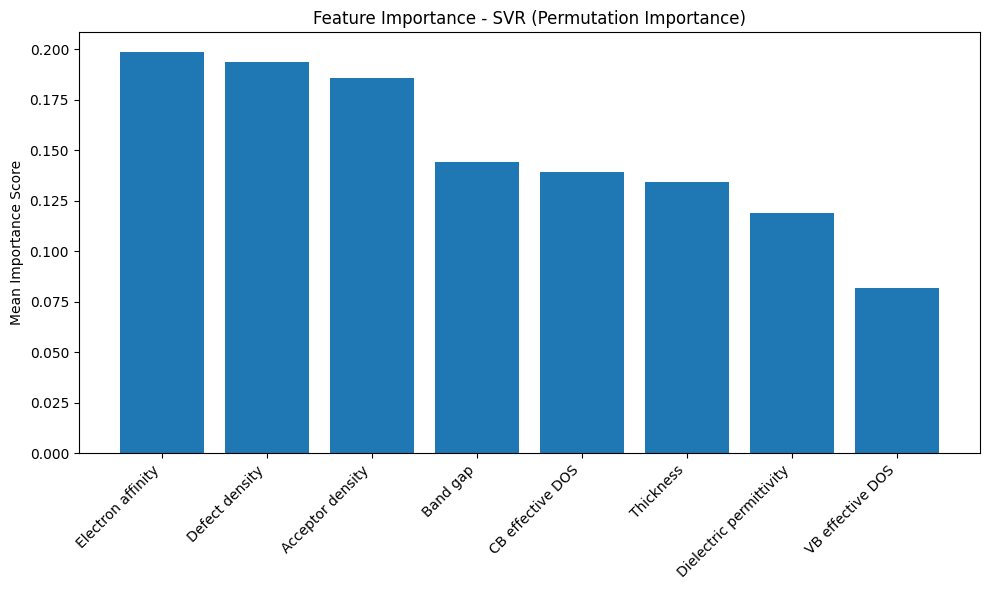

In [8]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

# Scale the data (important for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

# Use SCALED X_test here!
perm_importance = permutation_importance(svr_model, X_test_scaled, y_test, n_repeats=30, random_state=42)

# Organize importance
perm_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance Mean': perm_importance.importances_mean,
    'Importance Std': perm_importance.importances_std
})

perm_df = perm_df.sort_values(by='Importance Mean', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(perm_df['Feature'], perm_df['Importance Mean'])
plt.xticks(rotation=45, ha='right')
plt.title("Feature Importance - SVR (Permutation Importance)")
plt.ylabel("Mean Importance Score")
plt.tight_layout()
plt.show()


Kernel SHAP (SHapley Additive exPlanations)
Best for complex models like SVR.

Gives local and global explanations.

Very interpretable.

Using 614 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/100 [00:00<?, ?it/s]

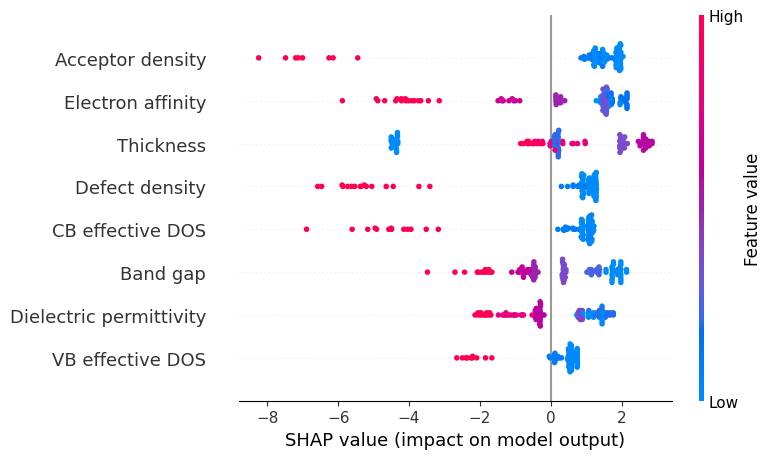

In [9]:
import shap

# Create a SHAP explainer for SVR
explainer = shap.KernelExplainer(svr_model.predict, X_train_scaled)

# Calculate SHAP values for a sample (e.g., first 100 points)
shap_values = explainer.shap_values(X_test_scaled[:100])

# Plot feature importance
shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=X.columns)


2. Partial Dependence Plots (PDP)
Shows how a feature affects the prediction.

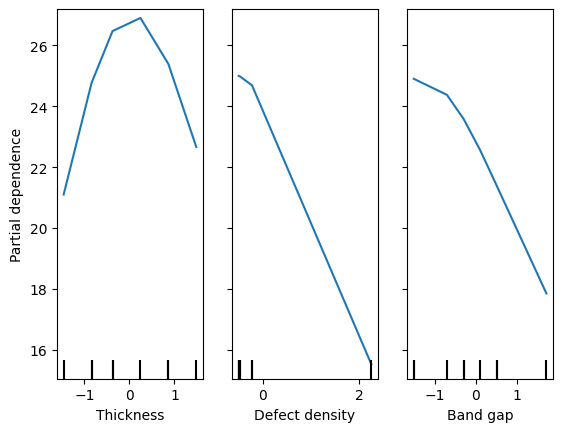

In [21]:
from sklearn.inspection import PartialDependenceDisplay

# Plot PDP for selected important features
PartialDependenceDisplay.from_estimator(
    svr_model,
    X_test_scaled,
    features=[0, 1, 2],  # feature indices
    feature_names=X.columns,
    kind='average'
)

plt.show()


3. Linear SVR (Linear Kernel) + Coefficients
If your data is somewhat linear, using Linear SVR instead of RBF kernel.

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


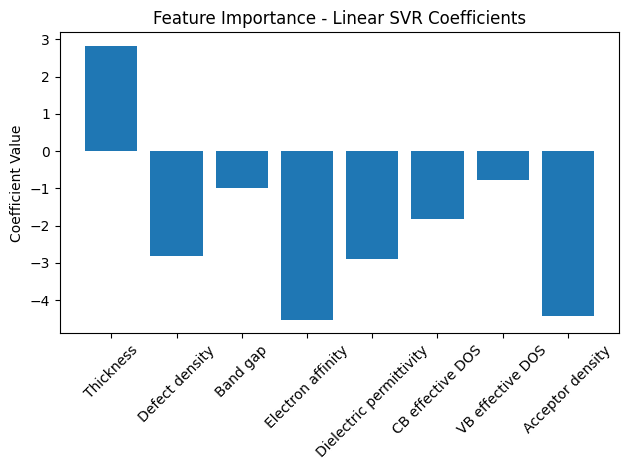

In [16]:
from sklearn.svm import LinearSVR

linear_svr = LinearSVR()
linear_svr.fit(X_train_scaled, y_train)

# Get coefficients (importance)
importance = linear_svr.coef_

# Plot
plt.bar(X.columns, importance)
plt.xticks(rotation=45)
plt.title("Feature Importance - Linear SVR Coefficients")
plt.ylabel("Coefficient Value")
plt.tight_layout()
plt.show()


Histograms

        Thickness  Defect density    Band gap  Electron affinity  \
count  768.000000    7.680000e+02  768.000000         768.000000   
mean     1.033333    1.851850e+15    1.283333           4.233333   
std      0.645056    3.663761e+15    0.124803           0.098666   
min      0.100000    1.000000e+11    1.100000           4.100000   
25%      0.500000    1.000000e+12    1.200000           4.150000   
50%      1.000000    5.500000e+13    1.275000           4.225000   
75%      1.600000    1.000000e+15    1.350000           4.300000   
max      2.000000    1.000000e+16    1.500000           4.400000   

       Dielectric permittivity  CB effective DOS  VB effective DOS  \
count               768.000000      7.680000e+02      7.680000e+02   
mean                 12.000000      1.943333e+19      1.943333e+19   
std                   6.835752      3.621828e+19      3.621828e+19   
min                   2.000000      1.000000e+17      1.000000e+17   
25%                   6.000000      5

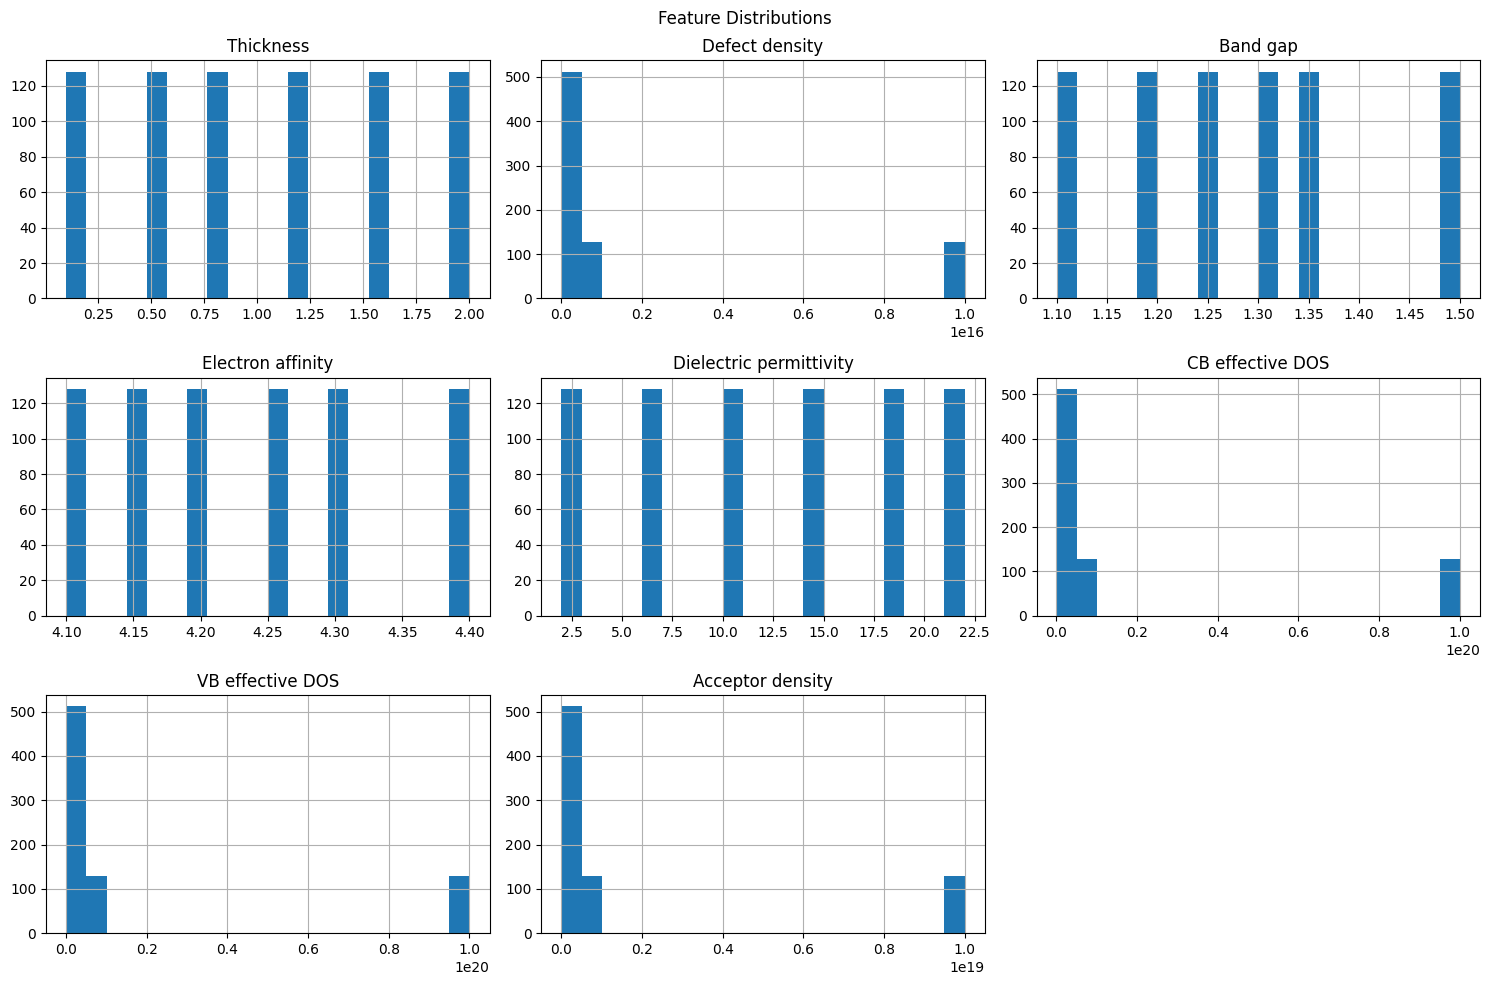

In [17]:
print(X.describe())
import matplotlib.pyplot as plt

X.hist(bins=20, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.tight_layout()
plt.show()


Correlation Heatmap

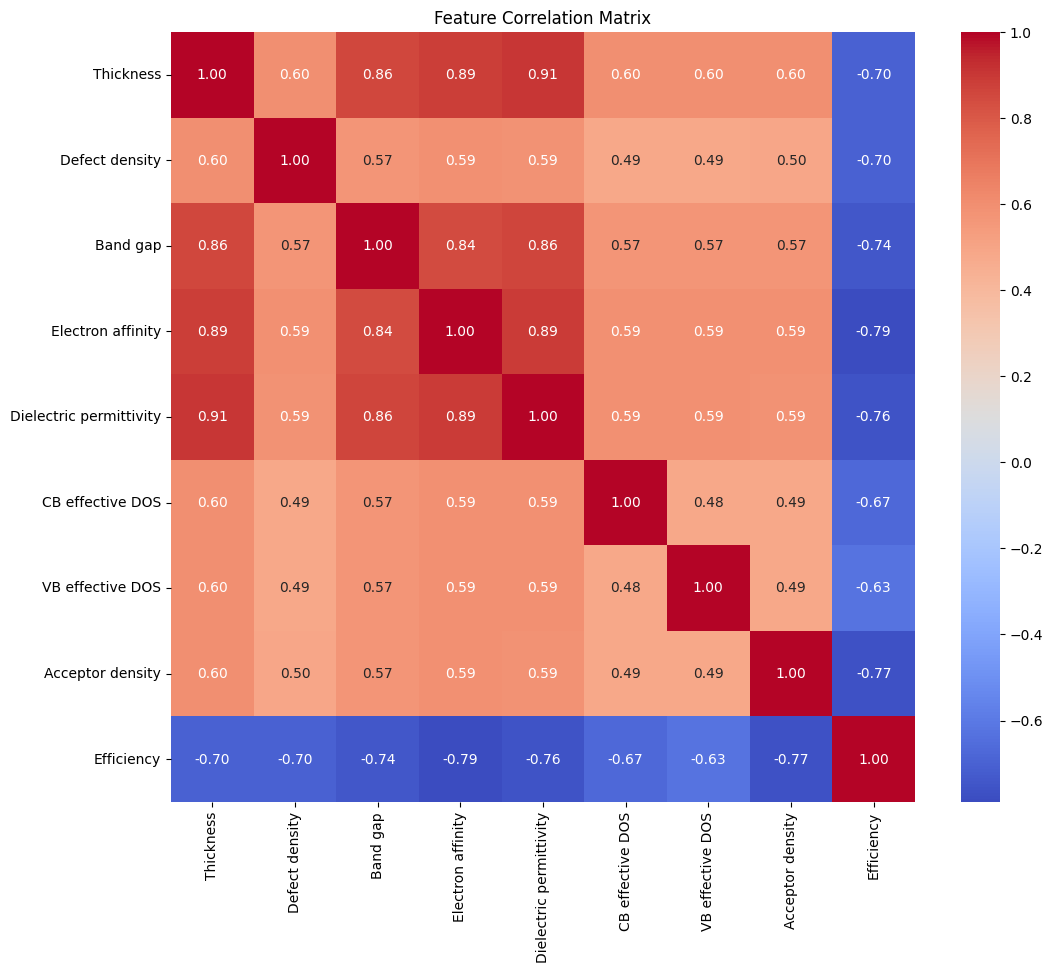

In [18]:
import seaborn as sns

# Combine X and y for heatmap
import pandas as pd
data = pd.concat([X, y], axis=1)

plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()


Scatter Plots: Important Feature vs Target (PCE)

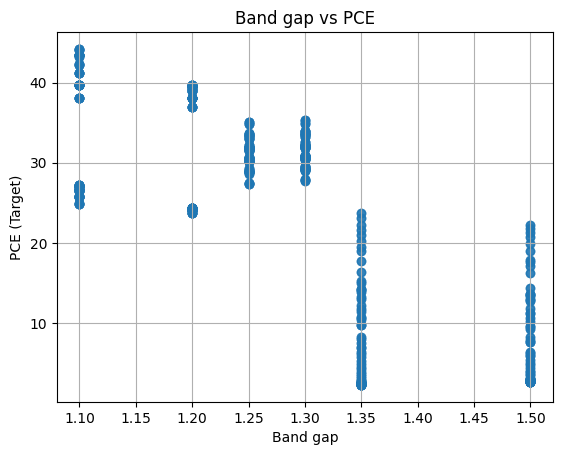

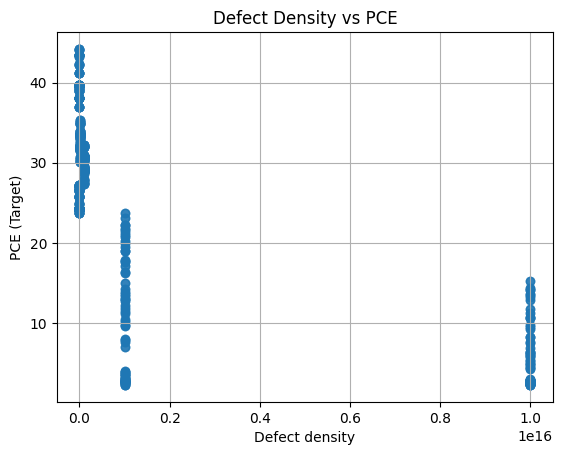

In [19]:
# Band gap vs Target
plt.scatter(X['Band gap'], y, alpha=0.7)
plt.xlabel('Band gap')
plt.ylabel('PCE (Target)')
plt.title('Band gap vs PCE')
plt.grid(True)
plt.show()

# Defect density vs Target
plt.scatter(X['Defect density'], y, alpha=0.7)
plt.xlabel('Defect density')
plt.ylabel('PCE (Target)')
plt.title('Defect Density vs PCE')
plt.grid(True)
plt.show()


Boxplots for Outlier Detection

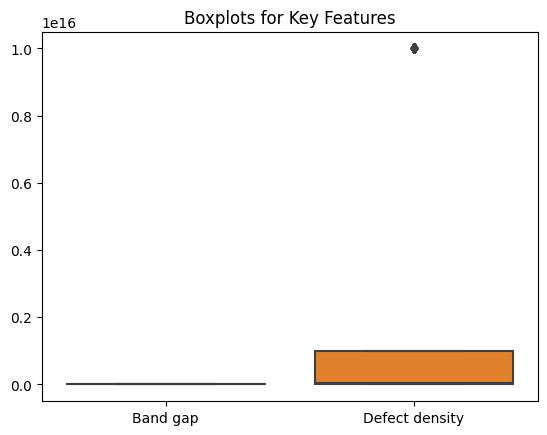

In [20]:
sns.boxplot(data=X[['Band gap', 'Defect density']])
plt.title('Boxplots for Key Features')
plt.show()
